In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [90]:
rho = 1000.0    # Density [kg/m³]
C = 4.18        # Heat capacity [J/(mol*K)]
miu_o = 0.5     # Pre-exponential factor for specific rate [s⁻¹]
Ea = 55000.0    # Activation energy [J/mol]
R = 8.314       # Gas constant [J/(mol*K)]
deltaH = 518 # Reaction enthalpy [J/mol]
UA = 10      # Heat transfer coefficient [W/K]


F_j = 18 # Flow rate (Jacket) [L/min]
T_J_in = 15 + 273.15  # Inlet temperature for jacket [K]
F_in = 51  # Inlet flow rate [L/min]
F_out = 40     # Outlet flow rate [L/min]
C_s_in = 60  # Inlet substrate concentration [g/L]
T_in = 25 + 273.15  # Inlet temperature [K]


In [99]:
def dynamic_model(t, y):
    V, T, T_J, C_s, C_p, C_X = y
    r_p = miu_o * np.exp(-Ea / (R * T))

    dV_dt = F_in - F_out
    dT_dt = (F_in / V) * (T_in - T) + deltaH * r_p * C_X + UA * (T_J - T)
    dT_J_dt = (F_j / V) * (T_J_in - T_J)
    dC_s_dt = (F_in / V) * (C_s_in - C_s) - r_p
    dC_p_dt = -((C_p * F_in) / V) + r_p * C_X
    dC_X_dt = r_p - F_out * C_X

    return [dV_dt, dT_dt, dT_J_dt, dC_s_dt, dC_p_dt, dC_X_dt]


In [100]:
V0 = 100        # Initial volume [L]
T0 = T_in + 20     # Initial reactor temperature [K]
T_J0 = T_J_in + 14   # Initial jacket temperature [K]
C_s0 = C_s_in + 3     # Initial substrate concentration [mol/L]
C_p0 = 0     # Initial product concentration [mol/L]
C_X0 = 0.5      # Initial cell concentration [mol/L]

y0 = [V0, T0, T_J0, C_s0, C_p0, C_X0]


In [101]:
t_eval = np.linspace(0, 100, 500)
t_span = (0, 100)
solution = solve_ivp(dynamic_model, t_span, y0, t_eval=t_eval, method='RK45')

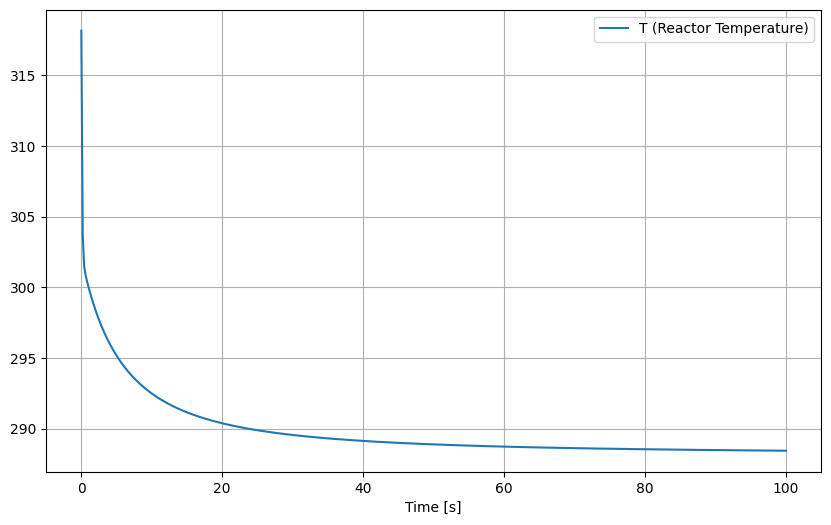

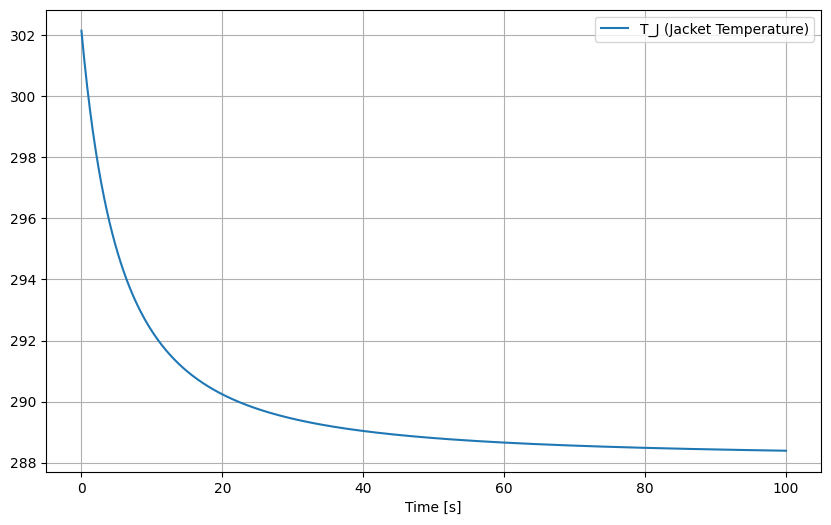

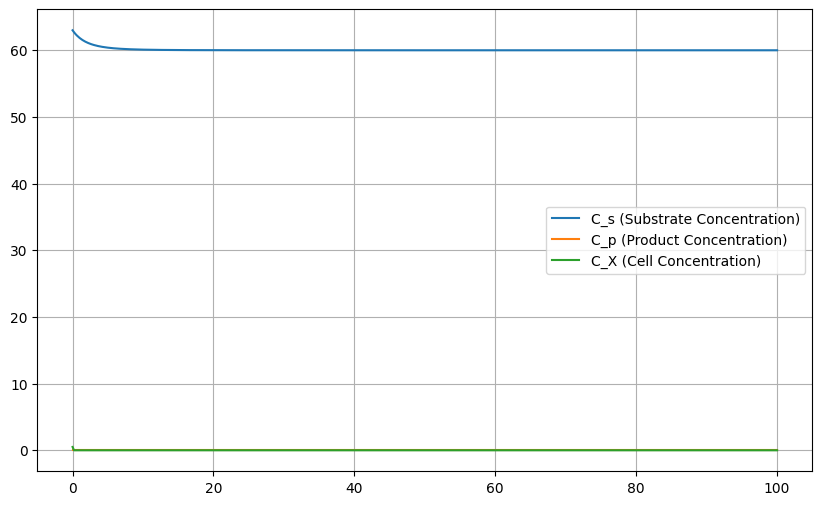

In [102]:
# plt.figure(figsize=(10, 6))
# plt.plot(solution.t, solution.y[0], label="V (Volume)")
# plt.xlabel("Time [s]")
# plt.grid()
# plt.legend()
# plt.show()

plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[1], label="T (Reactor Temperature)")
plt.xlabel("Time [s]")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[2], label="T_J (Jacket Temperature)")
plt.xlabel("Time [s]")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[3], label="C_s (Substrate Concentration)")
plt.plot(solution.t, solution.y[4], label="C_p (Product Concentration)")
plt.plot(solution.t, solution.y[5], label="C_X (Cell Concentration)")
plt.grid()
plt.legend()
plt.show()